> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-Show Appointments Hospital Data Inspection

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning"> Data Cleaning </a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

### In this project we are examining the data provided by the Vitoria Public Hospital in Brazil to discover potential factors leading to no show appointments. In this analysis, we will be asking the below questions to draw conclusions on likely reasons behind no shows. 

1. Is there a corelation between attendance and SMS reminders? 
2. Are senior citizens more likely to miss an appointment?
3. Is alcohol a factor that impacts attendance? 
4. Who in terms of age misses more appointments? (Age Distribution)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline 

df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

I will start off by inspecting the general characteristics of this dataset 

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I will check the size of the shared data 

In [4]:
df.shape 

(110527, 14)

I will see general information about each provided information (columns) and see the average, minimum and maximum set of each (useful for some, not so useful for others). Age for one is interesting, given the average age is 37 - not your expected age to be the highest requiring medical assistance. 

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here I will inspect if there are any missing data. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


I will check if there are any duplicated cells, which would be important to remove to not skew the data for this dataset, especially considering age, handicap and illness. 

In [7]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
110497    False
110498    False
110499    False
110500    False
110501    False
110502    False
110503    False
110504    False
110505    False
110506    False
110507    False
110508    False
110509    False
110510    False
110511    False
110512    False
110513    False
110514    False
110515    False
110516    False
110517    False
110518    False
110519    False
110520    False
110521    False
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: b

Considering there are no missing or dulicated rows, I can tell the only data cleaning I need to do is remove the columns that are not useful to me in answering my questions. 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Remove Unnecessary Columns)

In [8]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

Then I removed the coloumns with information, I knew will not be useful in answering my questions, such as patients' and appointment IDs.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What Impact does receiving an SMS have on Attendance)

Check the number of patients that received an SMS

In [9]:
received = df.query('SMS_received == 1')
received.count().mean()


35482.0

Check the number of patients that didnt NOT receive an SMS

In [10]:
not_received = df.query('SMS_received == 0')
not_received.count().mean()

75045.0

Get the means for each of the show and no -show fltered by SMS rceived / not received 

In [11]:
def get_noshow_mean(dataframe):
    no_show= dataframe[dataframe['No-show'] == 'Yes'].count() / dataframe.count()
    no_show=no_show.mean()
    return no_show

Get SMS received / No show mean 

In [12]:
sms_received_noshow_mean = get_noshow_mean(received)
sms_received_noshow_mean

0.27574544839637

Get SMS NOT received /No show mean

In [13]:
sms_not_received_noshow_mean = get_noshow_mean(not_received)
sms_not_received_noshow_mean

0.16703311346525415

Create a graph as a bar diagram to show the correlation between shows & no shows/SMS received and not received 

Text(0,0.5,'SMS-Received')

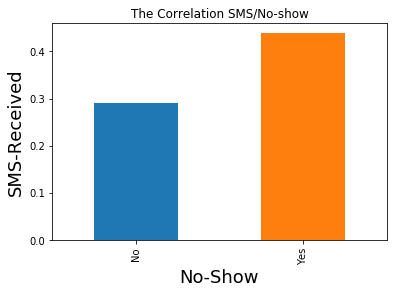

In [14]:
graph=df.groupby('No-show')['SMS_received'].mean()
graph.plot(kind='bar', title='The Correlation SMS/No-show')
plt.xlabel('No-Show', fontsize=18)
plt.ylabel('SMS-Received',fontsize=18)

I used the groupby function to find the average no-show within those that received an SMS and those that did not. Then I used the average of each next to each other.
By looking at the data, we can see that there are much more no shows within the people that received the SMS, than the ones who did not. Further investiagtion needs to be made as to possible reasons for this, since it goes against logic. Are people that receive SMSs, high risk patients? Are they patients with a record of missin appoitnments?

## Research Question 2: Are senior citizens more likely to miss an appointment?

First, I will see how many seniors and non seniors are there in the sample.

In [15]:
seniors=df.query('Age >= 60')
non_seniors=df.query('Age <60') 
non_seniors.count().mean()

89354.0

In [16]:
seniors.count().mean()

21173.0

In [17]:
no_show_seniors= get_noshow_mean(seniors)
no_show_seniors

0.15311953903556416

Then create a pandas query to find the senior_citizens among them. For the purpose of this analysis seniors are ages 60 and above 


In [18]:
no_show_non_seniors= get_noshow_mean(non_seniors)
no_show_non_seniors

0.21349911587617795

Create a bar showing the negative correlation between senior citizenry and no-show.

Text(0,0.5,'No-Show')

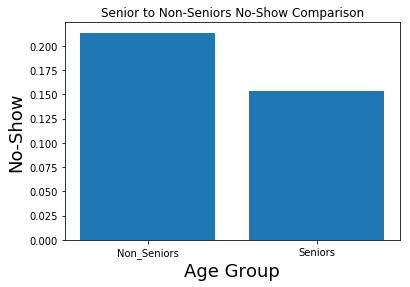

In [19]:
heights= [no_show_non_seniors, no_show_seniors]
locations=[1,2]
labels=['Non_Seniors', 'Seniors']
plt.bar(locations, heights, tick_label=labels)
plt.title('Senior to Non-Seniors No-Show Comparison')
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('No-Show',fontsize=18)

It is apparent there are much more no-shows amongst the young & adult group, than there is in the Senior Citizens group.

### Question 3: Is alcohol a factor that impacts attendance?

Compare No Shows betwen Alcoholics & Non Alcoholics.

In [20]:
df.groupby('No-show')['Alcoholism'].mean()

No-show
No     0.030417
Yes    0.030333
Name: Alcoholism, dtype: float64

Text(0,0.5,'Alcoholism')

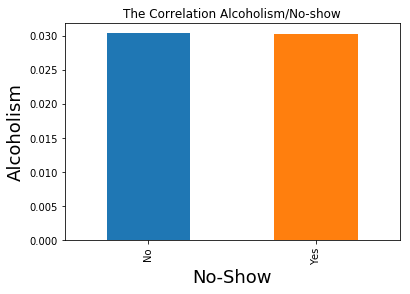

In [21]:
alcohol_graph=df.groupby('No-show')['Alcoholism'].mean()
alcohol_graph.plot(kind='bar', title='The Correlation Alcoholism/No-show')
plt.xlabel('No-Show', fontsize=18)
plt.ylabel('Alcoholism',fontsize=18)

It appears that alocholism does not impact no-show rates

### Question 5: Who in terms of age misses more appointments? (Age Distribution)

First, I will filter by no shows, but then I will also need to transform the Yes values into a number (int) to be able to work with it

In [22]:
df['NoShow'] = df['No-show'] == 'Yes'
df['NoShow'] = df['NoShow'].astype(int)
noshow_df = df.query('NoShow == 1');

Then count the number of no shows within each age group and plot it. This requires counting each age in the column and then converting the result into a dataframe.

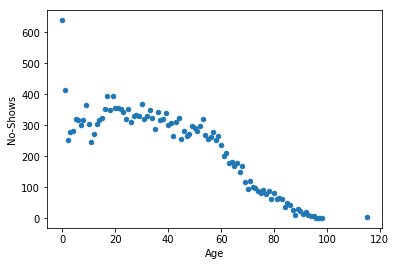

In [23]:
agedf = noshow_df.groupby('Age').size().to_frame(name = 'No-Shows').reset_index()
agedf.plot(x='Age', y='No-Shows', kind='scatter')

We can conclude that the older the Citizen's are, the less no shows.

<a id='conclusions'></a>
## Conclusions

From the priliminary inspection of data, there is a negative correlation between receiving an SMS and showing up. This is surprising, as it would be expected that sending a reminder to patients would increase attendance. Further investiagtion needs to be made as to possible reasons for this, such as what criteria grant receiving an SMS. Finding this out, could potentilly lead to a reason behind no shows. 
Alcoholism does NOT affect attendance, so it can be ruled out as a cause for no-shows. 
Senior citizens are less like to miss an appointment than non_seniors. There is a negative correlation between age and no shows, with no shows going down with the advancement of age. Further investigation into other possible factors that could cause this negative correlation between no-show and senior citizenry. Further causes could be severity of condition or residency at the hospital among other reasons. 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0